In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from numba import jit

import sys
sys.path.append('..')
from lib import *
from lib.maxent import *
from lib.netmhcrunutils import run_netMHC
plt.style.use('../peptidome.mplstyle')
import pyrepseq.plotting as pp

/media/andreas/data/repos/peptidome/code/maxent/../lib/main.py:419: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def mcmcsampler(x0, energy, jump, nsteps=1000, nburnin=0, nsample=1):


In [13]:
run_netMHC('../../data/UP000005640Human.fasta.gz', 'human', 'HLA-A0201')

/media/andreas/data/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /media/andreas/data/repos/peptidome/data/UP000005640Human.fasta.gz -xls -xlsfile /media/andreas/data/repos/peptidome/code/maxent/human-HLA-A0201.csv -a HLA-A0201


In [14]:
run_netMHC(proteome_path('Humanviruses'), 'virus', 'HLA-A0201')

/media/andreas/data/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /media/andreas/data/repos/peptidome/data/human-viruses-uniref90-filtered.fasta -xls -xlsfile /media/andreas/data/repos/peptidome/code/maxent/virus-HLA-A0201.csv -a HLA-A0201


In [22]:
k = 9
reference = set(count_kmers_proteome(human, k, clean=True))

In [23]:
flat = [''.join(np.random.choice(np.array(list(aminoacids)), size=k)) for i in range(20000)]

In [24]:
ns_flat = nndist_hamming_distribution(flat, reference)
ps_flat = ns_flat/np.sum(ns_flat)
ps_flat

array([5.0000e-05, 3.6500e-03, 1.8825e-01, 8.0805e-01])

In [25]:
virus = set(count_kmers_proteome(proteome_path('Humanviruses'), k, clean=True))

In [26]:
virus = list(pd.Series(list(virus)).sample(10000))

In [27]:
ns = nndist_hamming_distribution(virus, reference)
ps = ns/np.sum(ns)

In [28]:
human_hla = pd.read_csv('human-HLA-A0201.csv', index_col=0)

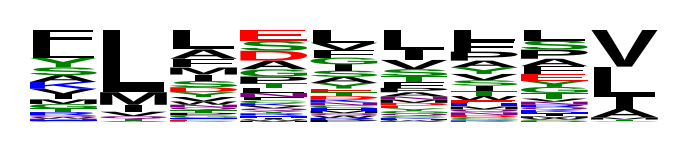

In [29]:
pp.seqlogos(human_hla['Peptide']);

In [30]:
virus_hla = pd.read_csv('virus-HLA-A0201.csv', index_col=0)

In [31]:
reference_hla = set(human_hla['Peptide'])

In [32]:
ns_hla = nndist_hamming_distribution(virus_hla['Peptide'], reference_hla)

In [33]:
ps_hla = ns_hla/np.sum(ns_hla)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


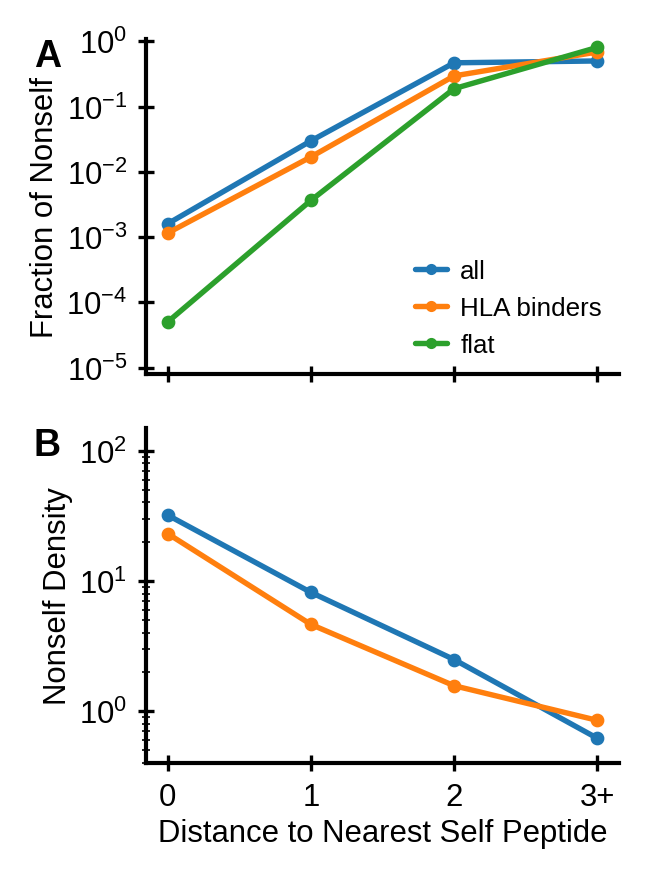

In [34]:
fig, axes = plt.subplots(figsize=(2.25, 3.0), nrows=2, sharex=True)
axes[0].plot(range(4), ps, '-o', label='all')
axes[0].plot(range(4), ps_hla, '-o', label='HLA binders')
axes[0].plot(range(4), ps_flat, '-o', label='flat')
for p in [ps, ps_hla]:
    axes[1].plot(range(4), p/ps_flat, '-o')


for ax in axes:
    ax.set_yscale('log')
    ax.set_xticks([0, 1, 2, 3])
    ax.set_xticklabels([0, 1, 2, '3+'])

axes[0].set_ylim(8e-6, 1.1)
axes[0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[1].set_yticks([1e0, 1e1, 1e2])
axes[1].set_ylim(4e-1, 1.5e2)

axes[0].set_ylabel('Fraction of Nonself')
axes[0].legend(loc='lower right')
axes[1].set_ylabel('Nonself Density')
axes[1].legend(loc='upper right')

axes[1].set_xlabel('Distance to Nearest Self Peptide')
pp.label_axes(fig, xy=(-0.18, 1.0), va='top', ha='right')
fig.tight_layout()
fig.savefig('neighbors_hla.svg')
fig.savefig('neighbors_hla.png')